![image.png](https://i.ibb.co/hg2Kd1X/seabornlogo.png)

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them

[Seaborn Source 01](https://seaborn.pydata.org/introduction.html), [Seaborn Source 02](https://seaborn.pydata.org/), [Seaborn Source 03](https://www.youtube.com/watch?v=GcXcSZ0gQps), [Seaborn Source 04](https://www.youtube.com/watch?v=6GUZXDef2U0) & [Seaborn Source 05](https://www.youtube.com/watch?v=Pkvdc2Z6eBg)

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">CONTENT</p>

* [MATPLOTLIB VS SEABORN](#0)
* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#1)
* [SEABORN PLOT TYPES](#2)
* [Does Seaborn use Matplotlib? Connecting to Figure in Matplotlib.](#3)
    * ["hue" Parameter](#3.1)
    * ["size" Parameter](#3.2)
    * ["style" Parameter](#3.3)
    * ["alpha" Parameter](#3.4)
* [EXPORTING (save) A SEABORN FIGURE](#4)
* [RUGPLOT](#5) 
* [DISPLOT & HISTPLOT](#6)        
* [DISPLOT](#7)
* [HISTPLOT](#8)
    * [The Number of Bins in Histogram](#8.1)
    * [Adding in a Grid & Styles](#8.2)
    * [Adding in Keywords from Matplotlib](#8.3)
* [THE KERNEL DENSITY ESTIMATION (KDE) PLOT](#9)
    * [Cut Off KDE](#9.1)
    * [Bandwidth](#9.2)
* [2-DIMENSIONAL KDE PLOTS](#10)
* [BONUS CODE FOR VISUALIZATIONS](#11)
    * [What is dpi in Figure?](#11.1)
* [THE END OF THE SEABORN SESSION 01](#12)    

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">MATPLOTLIB VS SEABORN</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### 1.Functionality:

**Matplotlib:** Matplotlib is mainly deployed for basic plotting. Visualization using Matplotlib generally consists of bars, pies, lines, scatter plots and so on.

**Seaborn:** Seaborn, on the other hand, provides a variety of visualization patterns. It uses fewer syntax and has easily interesting default themes. It specializes in statistics visualization and is used if one has to summarize data in visualizations and also show the distribution in the data.

### 2.Handling Multiple Figures:

**Matplotlib:** Matplotlib has multiple figures that can be opened, but need to be closed explicitly. plt.close() only closes the current figure. plt.close(‘all’) would close them all.

**Seaborn:** Seaborn automates the creation of multiple figures. This sometimes leads to OOM (out of memory) issues.

### 3.Visualization:

**Matplotlib:** Matplotlib is a graphics package for data visualization in Python. It is well integrated with NumPy and Pandas. The pyplot module mirrors the MATLAB plotting commands closely. Hence, MATLAB users can easily transit to plotting with Python.

**Seaborn:** Seaborn is more integrated for working with Pandas data frames. It extends the Matplotlib library for creating beautiful graphics with Python using a more straightforward set of methods.

### 4.Data frames and Arrays

**Matplotlib:** Matplotlib works with data frames and arrays. It has different stateful APIs for plotting. The figures and axes are represented by the object and therefore plot() like calls without parameters suffices, without having to manage parameters.

**Seaborn:** Seaborn works with the dataset as a whole and is much more intuitive than Matplotlib. For Seaborn, replot() is the entry API with ‘kind’ parameter to specify the type of plot which could be line, bar, or many of the other types. Seaborn is not stateful. Hence, plot() would require passing the object.

**Now it's all about your choice and the type of requirement.**

[SOURCE 01](https://www.kaggle.com/questions-and-answers/149640), [SOURCE 02](https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html) & [SOURCE 03](https://analyticsindiamag.com/comparing-python-data-visualization-tools-matplotlib-vs-seaborn/)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**NOTE:** There is NO need to import Matplotlib and seaborn for figures in Pandas. With a DataFrame, pandas creates by default one line plot for each of the columns with numeric data.<br>
Seaborn package is a Python data visualization library developed based on the Matplotlib library. Since Seaborn is built on Matplotlib they can be used together. Seaborn is used to create more attractive and informative statistical graphics. While Seaborn is a different package, it can also be used to develop the attractiveness of matplotlib graphics. When we load Seaborn into the session, everytime a Matplotlib is executed, Seaborn's default customizations are added.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

**Behind the scenes, seaborn uses matplotlib to draw its plots.**

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [5]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">SEABORN PLOT TYPES</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

![Capture12.PNG](https://i.ibb.co/Q9SXCR1/Capture12.png)

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">How to change a figure's size in Python Seaborn package</p>

[SOURCE](https://stackoverflow.com/questions/33446029/how-to-change-a-figures-size-in-python-seaborn-package)

In [2]:
# MATPLOTLIB
# plt.figure(figsize=(12, 8))
# plt.rcParams['figure.figsize']=(12, 8)
# plt.rcParams[] tüm notebooktaki gorsellerin figur sizelari icin
# plt.figure(figsize) ise sadece o an cizilen chart icin

#SEABORN
# sns.set(rc={'figure.figsize':(12, 8)})
# g=sns.pairplot()
# g.fig.set_size_inches(12, 8)

**matplotlib.rcParams** contains some properties in matplotlibrc file. We can use it to control the defaults of almost every property in Matplotlib: figure size and DPI, line width, color and style, axes, axis and grid properties, text and font properties and so on. In order to use matplotlib.rcParams, we should know what properties are stored in it, these properties can be foud in matplotlibrc file.

Seaborn has default congurations that can be applied with **sns.set()**. It uses the matplotlib rcParam system and will affect how all matplotlib plots look, even if you don’t make them with seaborn. Beyond the default theme, there are several other options, and you can independently control the style.

![image-2.png](https://i.ibb.co/n0WsYB1/seaborn-scatterplot.png)

Scatter plots can show how different features are related to one another, the main theme between all relational plot types is they display how features are interconnected to each other. There are many different types of plots that can be used to show this, so let's explore the scatterplot() as well as general seaborn parameters applicable to other plot types.

[SOURCE 01](https://seaborn.pydata.org/examples/different_scatter_variables.html), [SOURCE 02](https://towardsdatascience.com/7-points-to-create-better-scatter-plots-with-seaborn-9f0202fb2ba4), [SOURCE 03](https://www.python-graph-gallery.com/40-basic-scatterplot-seaborn), [SOURCE 04](https://www.educba.com/seaborn-scatter-plot/), [SOURCE 05](https://www.journaldev.com/39381/seaborn-scatter-plot) & [SOURCE 06](https://medium.com/@nutanbhogendrasharma/data-visualization-with-seaborn-part-1-1f4743274753)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Does Seaborn use Matplotlib? Connecting to Figure in Matplotlib.</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**Seaborn is a high-level library. It provides simple codes to visualize complex statistical plots, which also happen to be aesthetically pleasing. But Seaborn was built on top of Matplotlib, meaning it can be further powered up with Matplotlib functionalities.**

[SOURCE](https://towardsdatascience.com/seaborn-can-do-the-job-then-why-matplotlib-dac8d2d24a5f)

**Note how matplotlib is still connected to seaborn underneath (even without importing matplotlib.pyplot), since seaborn itself is directly making a Figure call with matplotlib. We can import matplotlib.pyplot and make calls to directly effect the seaborn figure.**

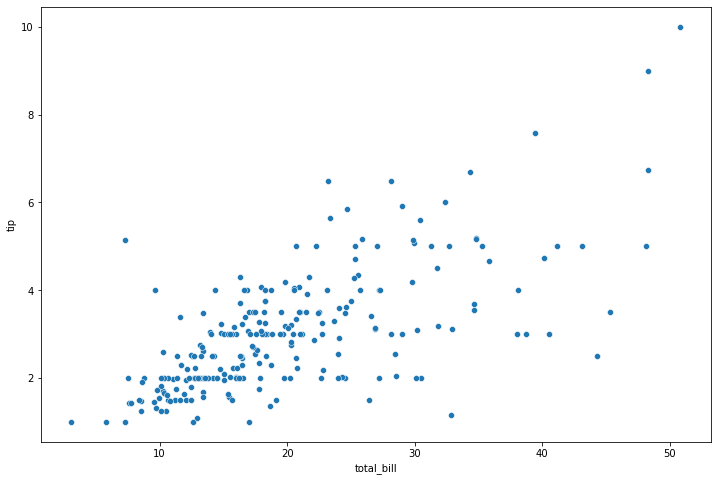

In [6]:
# örnek olsun diye cizelim
plt.figure(figsize=(12, 8))

sns.scatterplot(x = tips.total_bill, y = tips.tip, data = tips);
# labellar seaorn scatterplotta otomatik girlir. plt.xlabel(), plt.ylabel'a gerek yok

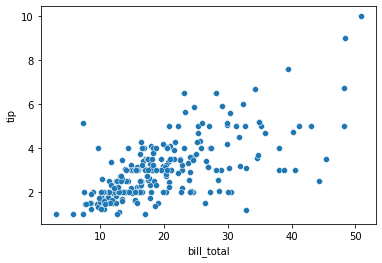

In [8]:
# eğer label yazmak istemezsek veya defaulu degistirmek istersek seabornun temelinde yatan matplotlibi kullaniriz
sns.scatterplot(x = tips.total_bill, y = tips.tip, data = tips);
plt.xlabel(None)
plt.xlabel("bill_total");

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

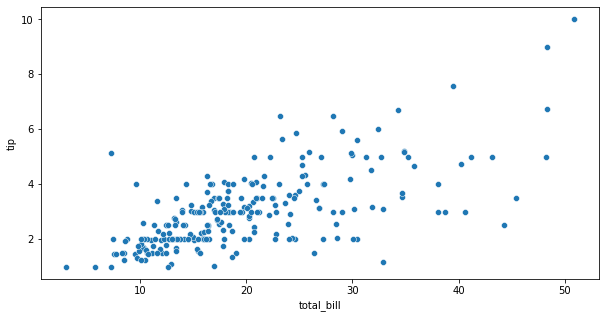

In [10]:
# 2. yontem. data parametresini kullanmamak icin seri ismi direkt kullanılır
plt.rcParams["figure.figsize"]=(10,5)

sns.scatterplot(x = tips["total_bill"], y = tips.tip)
# ama bunun bazı dezavantajları vari data parametresini kullanmak mantikli her zaman

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">"hue" Parameter</p>

<a id="3.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Color points based off a categorical feature in the DataFrame

[SOURCE 01](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) & [SOURCE 02](https://seaborn.pydata.org/examples/scatter_bubbles.html)

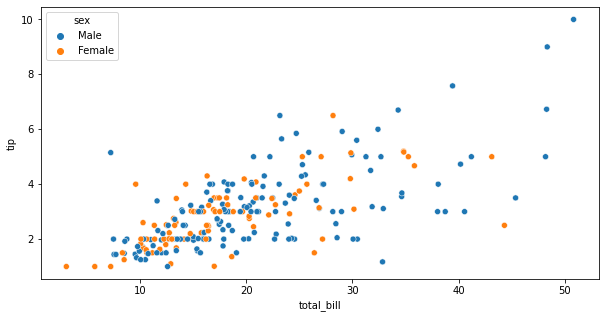

In [11]:
# kategorikal featurea gore dotları colorise
sns.scatterplot(x = tips.total_bill, y = tips.tip, data = tips, hue = "sex");

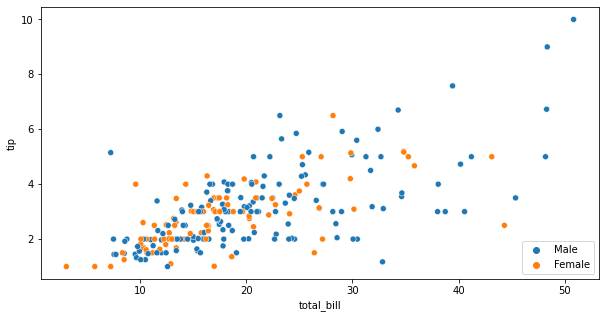

In [12]:
# matplotlib ozelliklerini burada da kullanabiliriz. ornegin legend
sns.scatterplot(x = tips.total_bill, y = tips.tip, data = tips, hue = "sex")
plt.legend(loc="lower right");

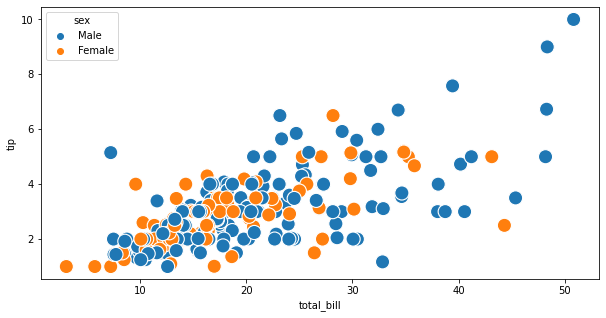

In [13]:
# datapointlerin boyutlarını degistirmek istersek s parametresi
sns.scatterplot(x = tips.total_bill, y = tips.tip, data = tips, hue = "sex", s = 200);
# bunun size'dan farki

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">"size" Parameter</p>

<a id="3.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Allows you to size based on another column 

[SOURCE 01](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), [SOURCE 02](https://seaborn.pydata.org/examples/scatter_bubbles.html), [SOURCE 03](https://www.delftstack.com/howto/seaborn/scatterplot-marker-size-seaborn/) & [SOURCE 04](https://stackoverflow.com/questions/52785101/seaborn-scatterplot-marker-size-for-all-markers)

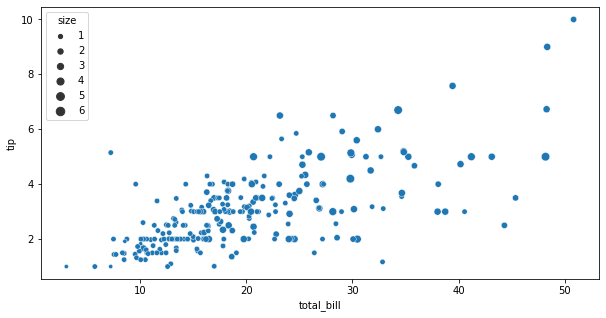

In [15]:
sns.scatterplot(x= "total_bill", y= "tip", data = tips, size = "size");
# her cinsiyetin noktalarını farklı boyutta getirdi.

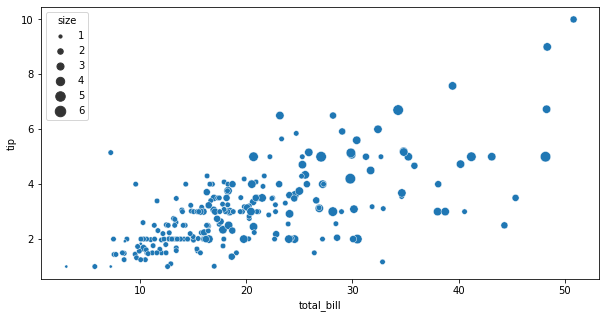

In [17]:
sns.scatterplot(x= "total_bill", y= "tip", data = tips, size = "size", sizes = [10,30,50,70,90,110]);
# sizes ile her kategorinin boyutunu ayarlayabiliriz. bunu bir tuple ile min mac degerleri vererek de sizes = (50,250)
# yapabiliriz

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">"style" Parameter</p>

<a id="3.3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Automatically choose styles based on another categorical feature in the dataset. Optionally use the **markers=** parameter to pass a list of marker choices based off matplotlib, for example: ['*','+','o']

[SOURCE 01](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) & [SOURCE 02](https://www.codecademy.com/article/seaborn-design-i)

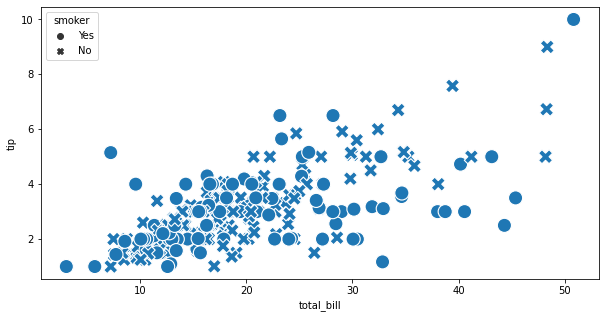

In [19]:
# hue ve size gibi kategorik bir veriyi alıp data pointlerin stylını degistirir bu da
sns.scatterplot(x= "total_bill", y= "tip", data = tips, style = "smoker", s =200);

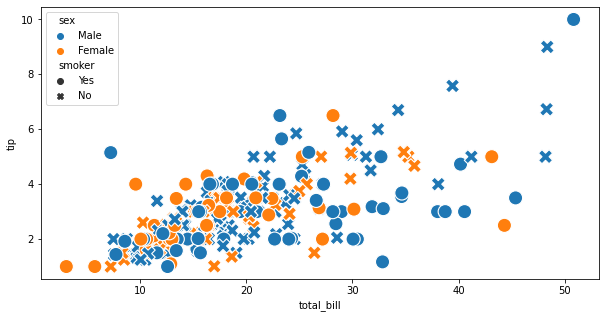

In [20]:
# hue eklersek bir de
sns.scatterplot(x= "total_bill", y= "tip", data = tips, style = "smoker", s =200, hue = "sex");
# mavi yukarlak smoker male, tutunrcu x nonsmoker female

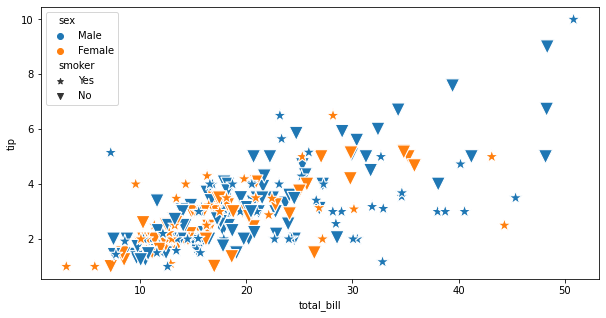

In [22]:
# markers ozellestirilebilir
sns.scatterplot(x= "total_bill", y= "tip", data = tips, style = "smoker", s =200, hue = "sex", markers = ["*", "v"]);

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">"alpha" Parameter</p>

<a id="3.4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Proportional opacity of the points.

To control the transparency of plots, we can use the alpha argument within the plot function. By default, its value is 1. The value of this parameter ranges from 0 to 1, with the plot getting more transparent and invisible as the value reaches 0. It can be used directly in most of the plot functions of the seaborn module.

[SOURCE 01](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), [SOURCE 02](https://www.delftstack.com/howto/seaborn/seaborn-plots-transparency/) & [SOURCE 03](https://stackoverflow.com/questions/54389331/adjust-different-transparency-for-different-class-in-seaborn-scatter-plot)

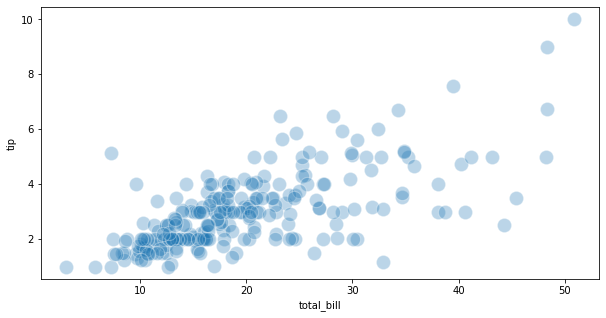

In [24]:
# pointlerin saydamlığını ayarlar, 0 ile 1 arasındadır. default 1
sns.scatterplot(x= "total_bill", y= "tip", data = tips, s =200, alpha =0.3);
# verilerin yogunlastigi yerleri daha iyi gorebilriz

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">EXPORTING (save) A SEABORN FIGURE</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

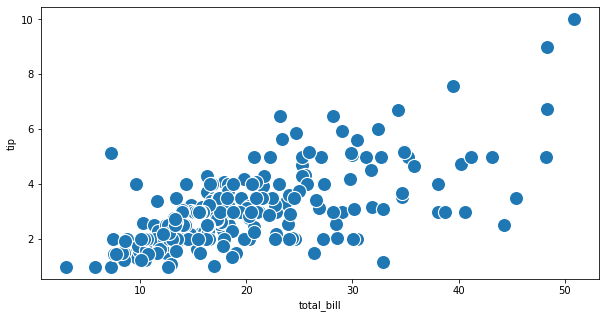

In [26]:
# bu figurleri seaborn ile nasıl kaydederiz.

sns.scatterplot(x= "total_bill", y= "tip", data = tips, s =200, alpha =1);
# aynı yontemle yapılabilir plt ile
# plt.savefig("seaborn_scatter_plot.pdf")

![image.png](attachment:image.png)

[VIDEO SOURCE](https://www.youtube.com/watch?v=S12WV-NoCNQ)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">RUGPLOT</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

A rugplot is a graph that places a dash horizontally with each occurrence of an item in a dataset. Areas where there is great occurrence of an item see a greater density of these dashes. Areas where there is little occurrence of an item see just occasional dashes. This is the essence of a rugplot.<br>
Seaborn already has built-in data sets. A rug plot is a plot of data for a single quantitative variable, displayed as marks along an axis. Rug plots are often used in combination with two-dimensional scatter plots by placing a rug plot of the x values of the data along the x-axis, and similarly for the y values.

Plot marginal distributions by drawing ticks along the x and y axes.

This function is intended to complement other plots by showing the location of individual observations in an unobstrusive way.

[SOURCE 01](https://seaborn.pydata.org/generated/seaborn.rugplot.html) & [SOURCE 02](http://www.learningaboutelectronics.com/Articles/How-to-create-a-rugplot-in-seaborn-with-Python.php)

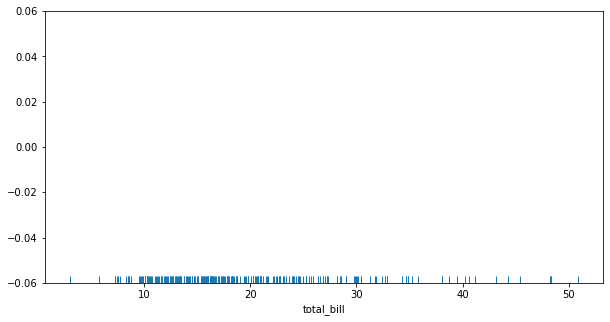

In [27]:
sns.rugplot(x="total_bill", data=tips);
# tek bir numeric veri

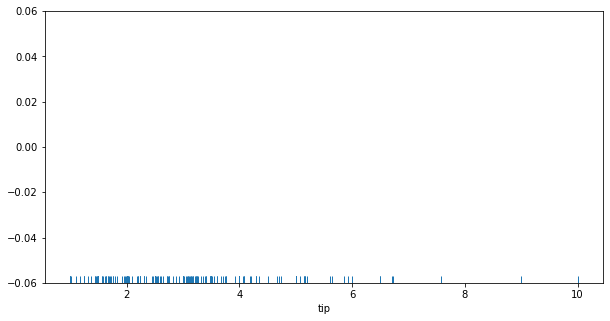

In [28]:
sns.rugplot(x="tip", data=tips);

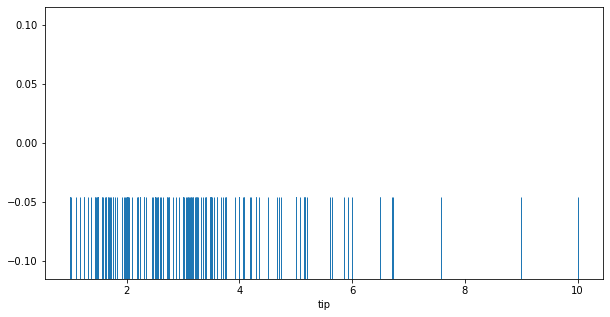

In [29]:
# boyutları height parametresi belirliyor, 0.025 default. degitirelim
sns.rugplot(x="tip", data=tips, height=0.3);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">DISPLOT & HISTPLOT</p>

<a id="6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The rugplot itself is not very informative for larger data sets distribution around the mean since so many ticks makes it hard to distinguish one tick from another. Instead we should count the number of tick marks per some segment of the x axis, then construct a histogram from this.

**What is Distplot in Seaborn?**

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it.

**Warning**

This function (Distplot) is deprecated and will be removed in a future version. Please adapt your code to use one of two new functions:

**displot(),** a figure-level function with a similar flexibility over the kind of plot to draw

**histplot(),** an axes-level function for plotting histograms, including with kernel density smoothing

Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins.

This function can normalize the statistic computed within each bin to estimate frequency, density or probability mass, and it can add a smooth curve obtained using a kernel density estimate, similar to kdeplot().

The displot is a plot type that can show you the distribution of a single feature. It is a histogram with the option of adding a "KDE" plot (Kernel Density Estimation) on top of the histogram. Let's explore its use cases and syntax.

[SOURCE 01](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot), [SOURCE 02](https://www.geeksforgeeks.org/how-to-make-histograms-with-density-plots-with-seaborn-histplot/) & [SOURCE 03](https://seaborn.pydata.org/generated/seaborn.histplot.html)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">DISPLOT</p>

<a id="7"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

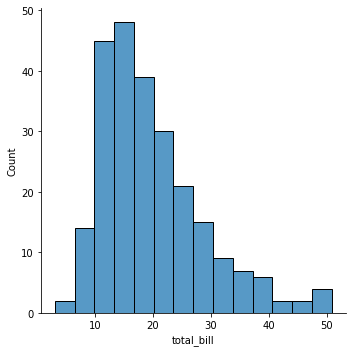

In [34]:
sns.displot(x="total_bill", data = tips);
# displot default olarak histogram calistirir.

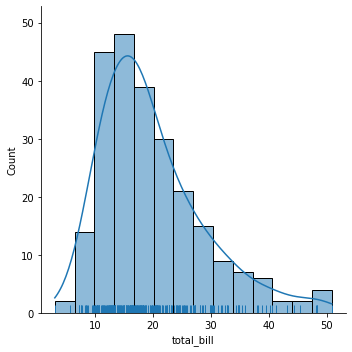

In [36]:
sns.displot(x="total_bill", data = tips, kde = True, rug=True);
# rug gormek icin, 

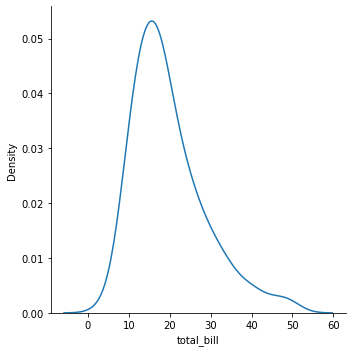

In [41]:
sns.displot(x="total_bill", data = tips, kind="kde");

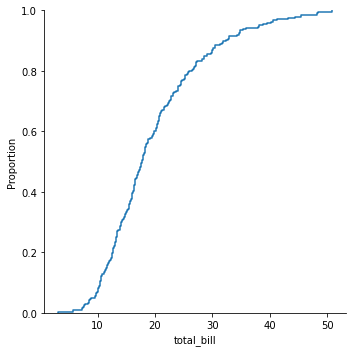

In [42]:
sns.displot(x="total_bill", data = tips, kind="ecdf");
# ecdf: empirical cumulative descriptive function

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">HISTPLOT</p>

<a id="8"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

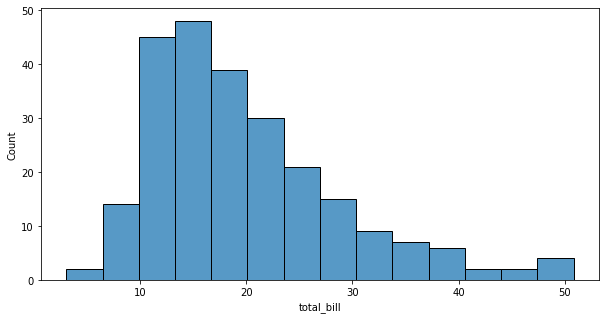

In [43]:
sns.histplot(x="total_bill", data=tips);

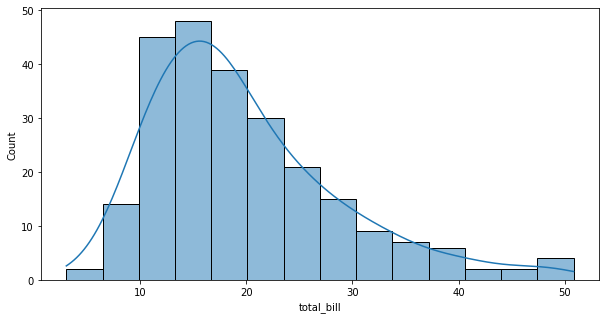

In [44]:
sns.histplot(x="total_bill", data=tips, kde=True);

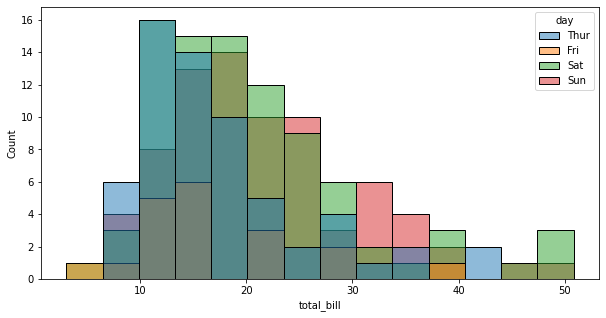

In [45]:
sns.histplot(x="total_bill", data=tips, hue="day");

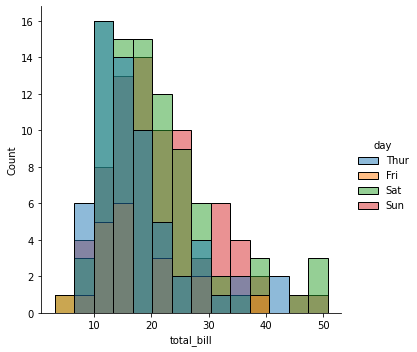

In [58]:
# yukarda barlar ustuste bindigi icin anlamı yok. her gunu birbirinden ayrı 4 histogram olarak gostermeliyiz.
# bu histplot ve displot farkı
sns.displot(x = "total_bill", data=tips, hue="day")

# bunun size'ı neden farklı oldu.Facetgrid obje olusturdu cunku. nasıl cozeriz:

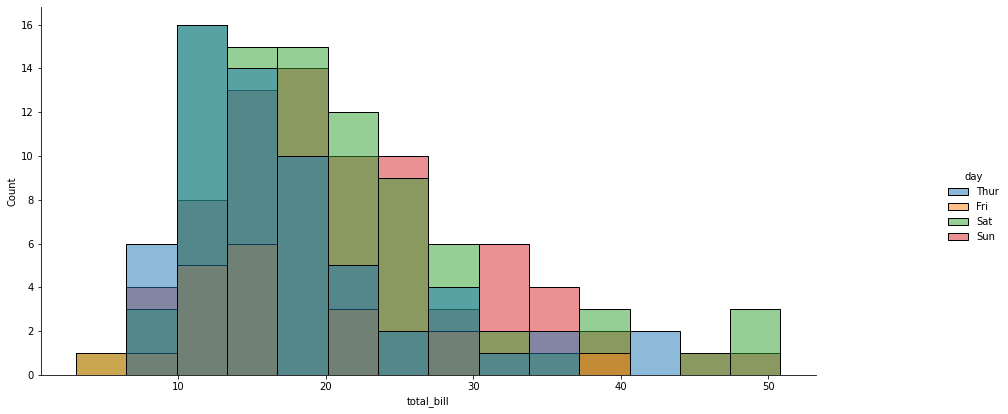

In [59]:
g = sns.displot(x = "total_bill", data=tips, hue="day")

g.fig.set_size_inches(15, 6)

# bunu height parametresi ve aspect parametresini degistirerek de yapabiliriz.

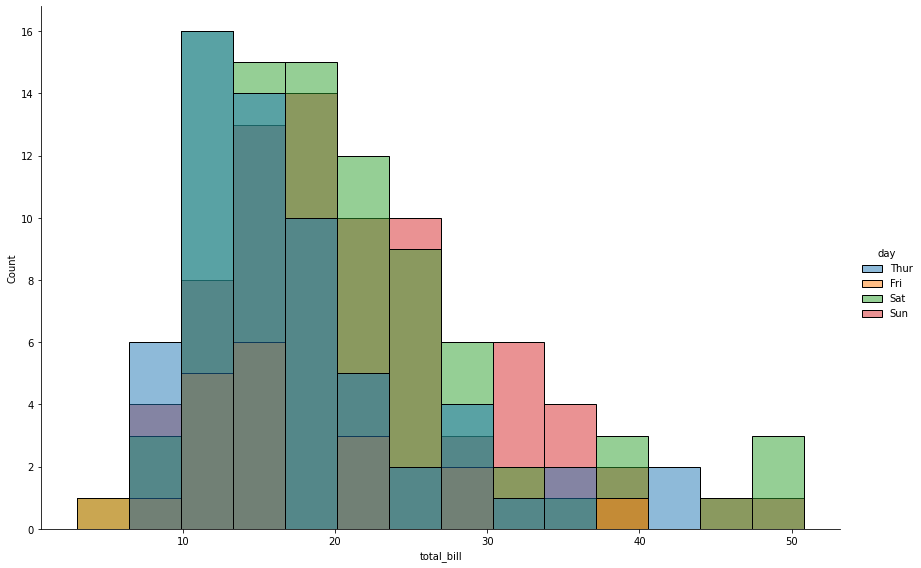

In [61]:
sns.displot(x = "total_bill", data=tips, hue="day", height = 8, aspect = 1.5)

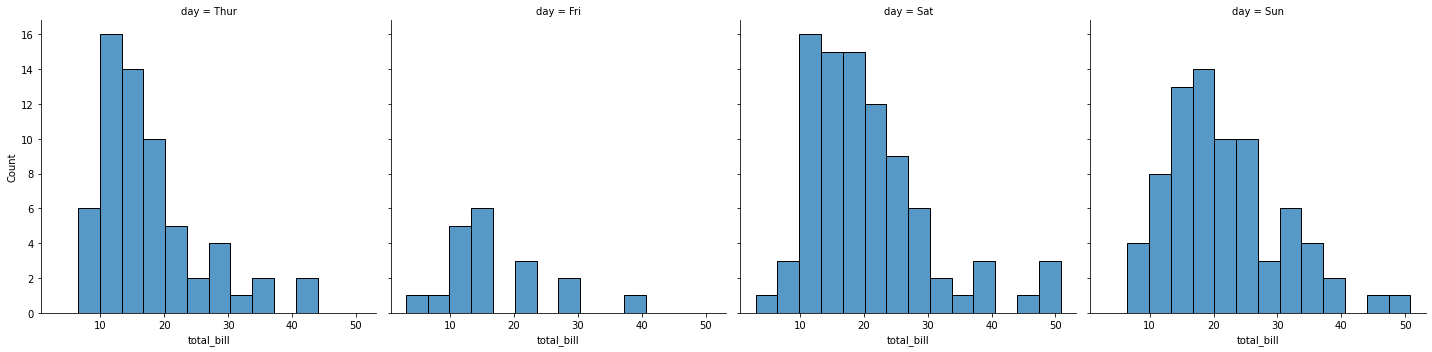

In [54]:
# peki gunleri nasil ayirabiliriz. co parametresi ile... heu'ya gerek kalmaz
sns.displot(x = "total_bill", data=tips, col = "day");

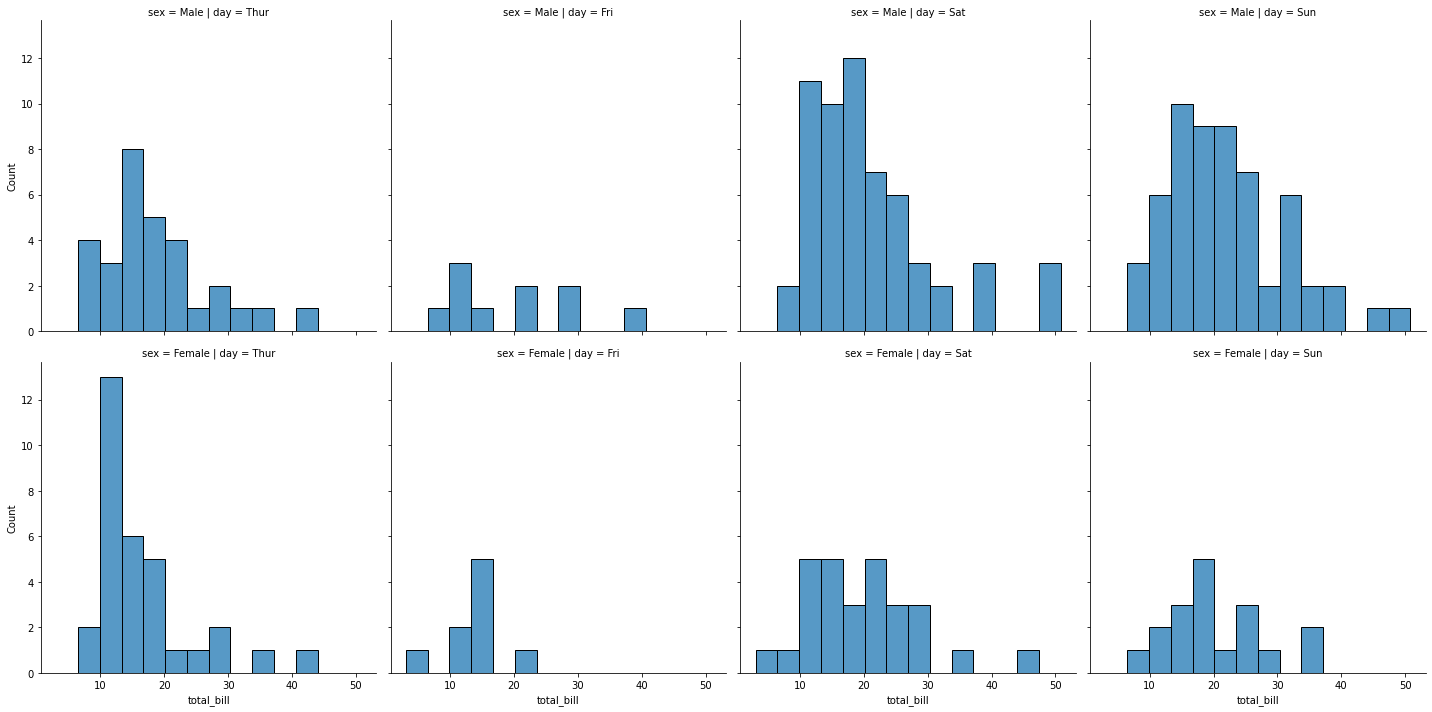

In [55]:
# buna bir de row ekleyelim
sns.displot(x = "total_bill", data=tips, col="day", row = "sex");

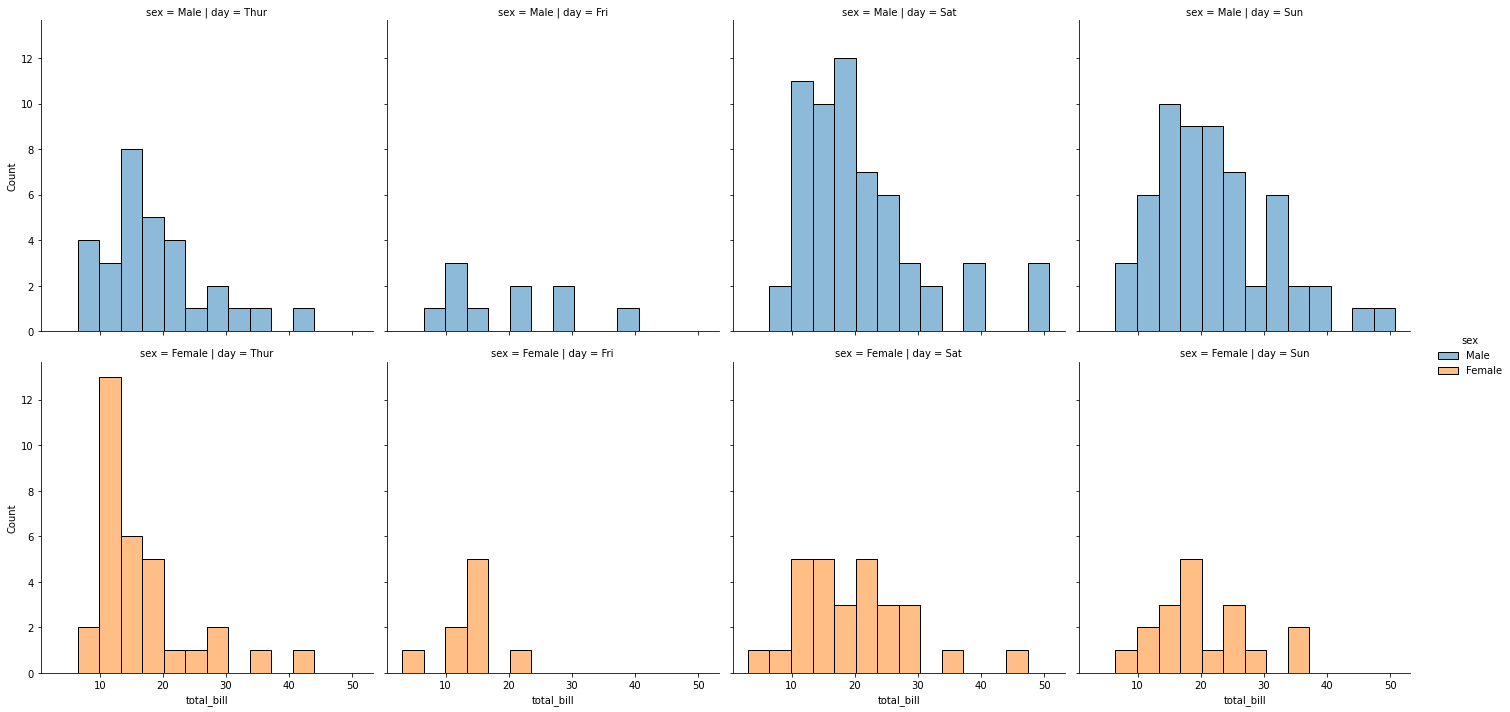

In [57]:
sns.displot(x = "total_bill", data=tips, col = "day", row= "sex", hue="sex");

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">The Number of Bins in Histogram</p>

<a id="8.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

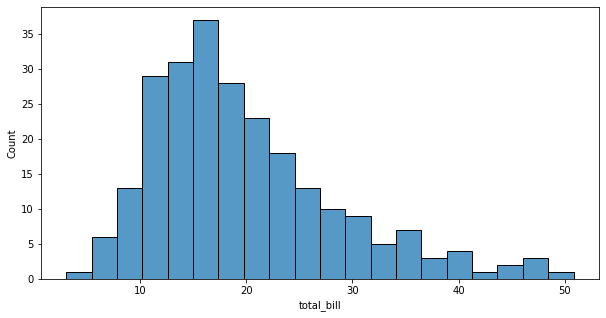

In [62]:
# defaultunda 14 binle cizdirdi bunu. bins parametresi ile degistirelim
sns.histplot(x="total_bill", data=tips,bins = 20);
# dagilimi 20 es parcaya bolduk.

In [ ]:
# peki bins sayısını nasıl belirleyecegiz. asagidaki fonksiyon optimum bin sayısını belirliyor. ilerde lazım olursa:

# How many bins? 
[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/7ca5T3nuCuU/0.jpg)](https://www.youtube.com/watch?v=7ca5T3nuCuU)


In [63]:
def freedman_diaconis(data, returnas="bins"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = np.asarray(data, dtype=np.float_)
    IQR  = stats.iqr(data, rng=(25, 75))
    N    = data.size
    bw   = (2 * IQR) / np.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return result

In [64]:
freedman_diaconis(tips.total_bill)

14

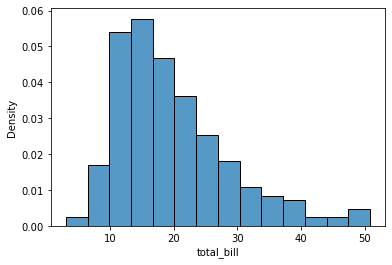

In [6]:
# stat argument default count, ama drgisitilebilir
sns.histplot(x = "total_bill", stat="density", data = tips);
# density : area of histogram sums to one

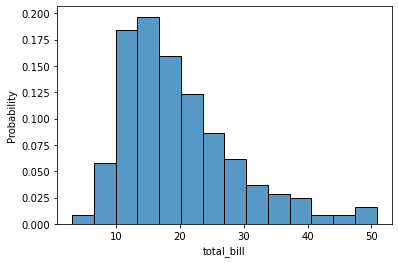

In [8]:
sns.histplot(x = "total_bill", stat="probability", data = tips);
# probability: height of histogram bars to one

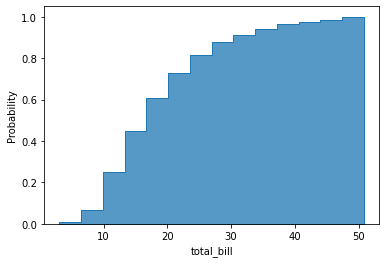

In [11]:
# cumulative
sns.histplot(x = "total_bill", stat="probability", cumulative = True, fill= True,element="step", data = tips);

**Bivariate Histplot**

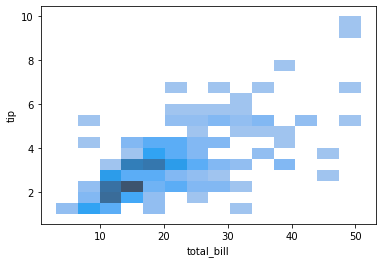

In [13]:
# 2 different variables and colors
sns.histplot(x= "total_bill", y = tips.tip, data = tips);

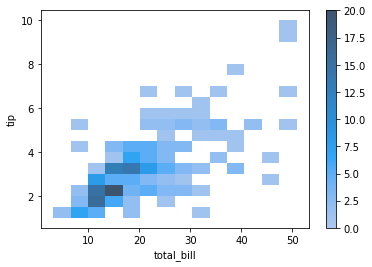

In [14]:
# a disadvantage iis we don't have a scale on y axis since it also hosts a numeric variable.
# what can we do: we can add a color bar
sns.histplot(x= "total_bill", y = tips.tip, data = tips, cbar = True);

# en koyu yerde 20 varmis ornegin

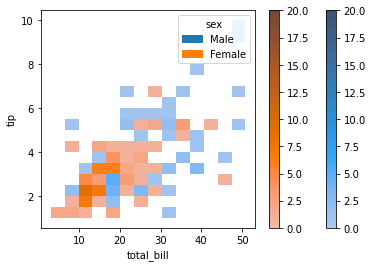

In [15]:
sns.histplot(x= "total_bill", y = tips.tip, data = tips, cbar = True, hue= "sex");

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Adding in a Grid & Styles</p>

<a id="8.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

sns.set() You can also customize seaborn theme or use one of six variations of the default theme. Which are called deep, muted, pastel, bright, dark, and colorblind.

You can reset to a different default style: one of {darkgrid, whitegrid, dark, white, ticks}.

In a later notebook and lecture we will cover custom styling in a lot more detail.

[SOURCE](https://towardsdatascience.com/matplotlib-seaborn-basics-2bd7b66dbee2)

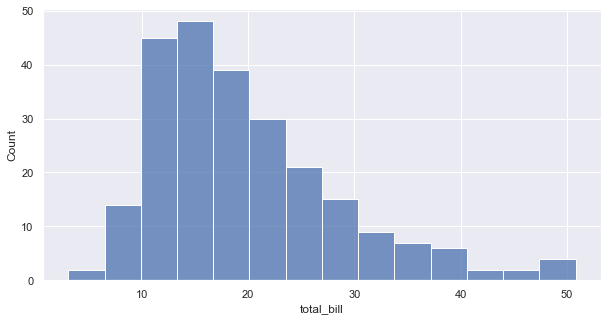

In [65]:
# sns.set() default olarak gird styleı degistirir
sns.set()
sns.histplot(data=tips, x = "total_bill");

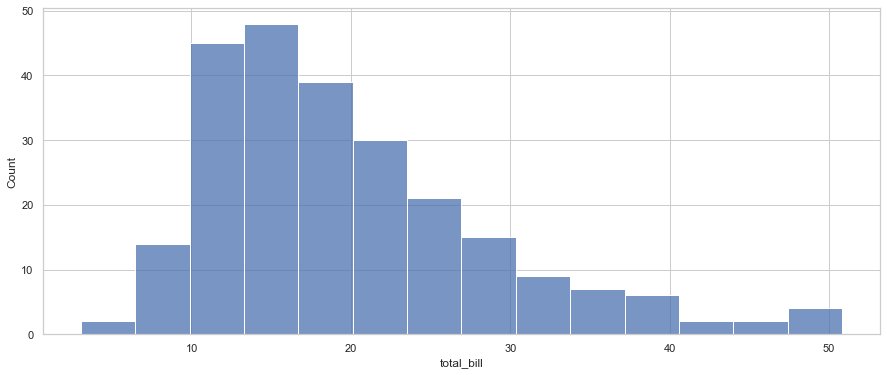

In [68]:
sns.set_theme(style="whitegrid", rc={"figure.figsize":(15,6)})
sns.histplot(data=tips, x = "total_bill");

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Adding in Keywords from Matplotlib</p>

<a id="8.3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Seaborn plots can accept keyword arguments directly from the matplotlib code that seaborn uses. Keep in mind, not every seaborn plot can accept all matplotlib arguments, but the main styling parameters we've discussed are available. 

In [75]:
sns.reset_defaults()

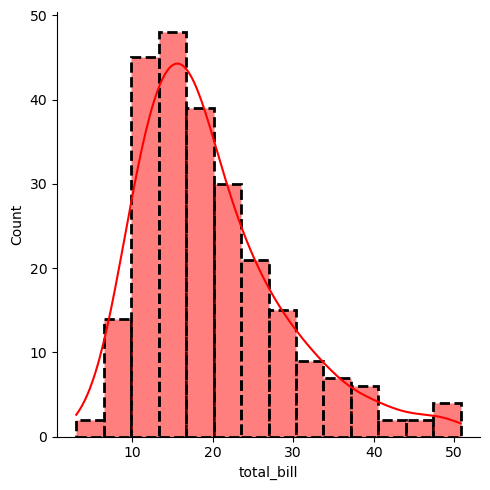

In [76]:
sns.displot(data=tips, x = "total_bill", kde=True, color="red", edgecolor = "black", lw= 3, ls="--")

In [ ]:
# kenarları, labelları vs kaldırmak istersek sns.despine(left=True, )
plt.figure(figsize=(7,4))
sns.histplot(data=tips, x = "total_bill", alpha=1)
sns.despine(left=True)
plt.yticks([])  # ynin tickler kalkar
plt.xlabel('')
plt.ylabel('')
plt.tight_layout();

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">THE KERNEL DENSITY ESTIMATION (KDE) PLOT</p>

<a id="9"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions. The approach is explained further in the user guide.

The KDE plot maps an estimate of a probability *density* function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

[SOURCE](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#:~:text=A%20kernel%20density%20estimate%20(KDE,further%20in%20the%20user%20guide.)

**How does a Kernel Density Estimation work?**

The Kernel Density Estimation works by plotting out the data and beginning to create a curve of the distribution. The curve is calculated by weighing the distance of all the points in each specific location along the distribution. If there are more points grouped locally, the estimation is higher as the probability of seeing a point at that location increases. The kernel function is the specific mechanism used to weigh the points across the data set. The bandwidth of the kernel changes its shape. A lower bandwidth limits the scope of the function and leads to the estimate curve looking rough and jagged. By tweaking the parameters of the kernel function (bandwidth and amplitude), one changes the size and shape of the estimate.

[SOURCE](https://deepai.org/machine-learning-glossary-and-terms/kernel-density-estimation)

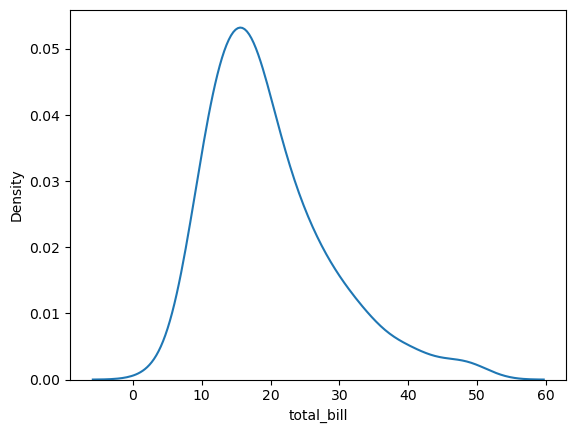

In [79]:
sns.kdeplot(x = "total_bill", data=tips);

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Cut Off KDE</p>

<a id="9.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

We could cut off the KDE if we know our data has hard limits (no one can be a negative age and no one in the population can be older than 100 for some reason)

For more intiutive knowledge, dive into the discussion at stackoverflow:

[SOURCE 01](https://stackoverflow.com/questions/45911709/limit-the-range-of-x-in-seaborn-distplot-kde-estimation), [SOURCE 02](http://man.hubwiz.com/docset/Seaborn.docset/Contents/Resources/Documents/generated/seaborn.kdeplot.html) & [SOURCE 03](https://towardsdatascience.com/all-you-need-to-know-about-seaborn-6678a02f31ff)

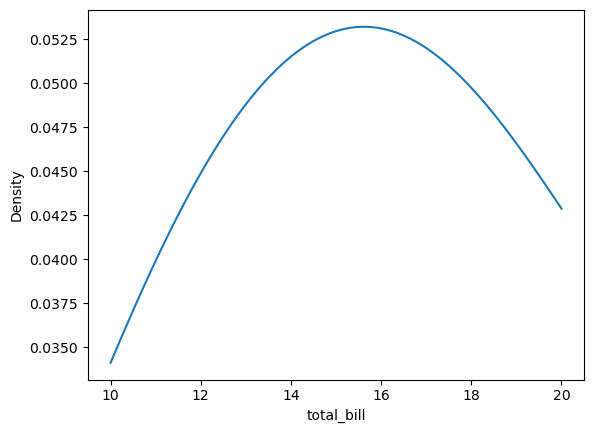

In [80]:
# belli alana zoom yapmak istersek
sns.kdeplot(x = "total_bill", data=tips, clip = [10,20]);
# xlim ylim gibi

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Bandwidth</p>

<a id="9.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

the KDE is constructed through the summation of the kernel (most commonly Gaussian), we can effect the bandwith of this kernel **to make the KDE more "sensitive" to the data.** Notice how with a smaller bandwith, the kernels don't stretch so wide, meaning we don't need the cut-off anymore. This is analagous to increasing the number of bins in a histogram (making the actual bins narrower).

In statistics, Kernel Density Estimation is a non-parametric technique that calculates and plots the probability distribution(the probability density) of a continuous random variable. i.e., The calculation does not assume the underlying data to be following the assumptions of a normal distribution or any distribution.
In simple terms, Kernel Density Estimate is like a smoothened counterpart of a histogram without the line of histogram intervals and their end-points.

Such a smoothened curve for the probability density of a given data is obtained by drawing individual estimates for the data points and summing them up to produce the final contour.
The bandwidth 'h' used in the estimation plays a role in the level of smoothness of the estimated curve. The lower the 'h' - more closer to the data and more spiky the curve is. When the value of 'h' is higher the resultant curve is over smoothend.

[SOURCE 01](https://pythontic.com/visualization/seaborn/kdeplot) & [SOURCE 01](https://www.youtube.com/watch?v=DCgPRaIDYXA)

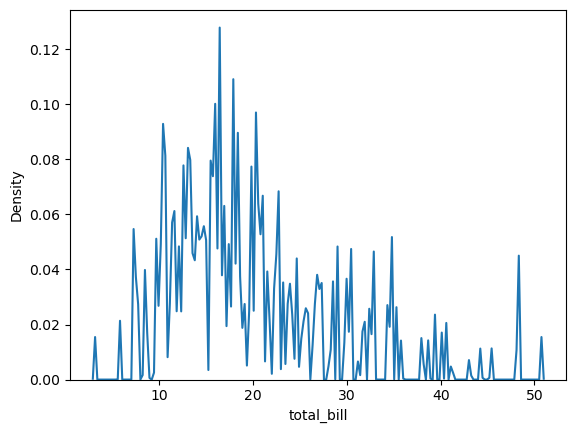

In [83]:
sns.kdeplot(x = "total_bill", data=tips, bw_adjust=0.02);

An important parameter is the bandwidth: the smaller it is, the closer the curve fits to the data, the wider the better to indicate a general form.

It seems seaborn and pandas are using a different approach to estimate a "good" bandwidth. With seaborn you could set a fixed bandwidth sns.kdeplot(..., bw=0.5) or so. Or seaborn.distplot(..., kde=True, kde_kws={'bw': 0.5}). With pandas df.plot.kde(bw_method=0.5, ...). Note that the "perfect" bandwidth doesn't exist, it depends on the data, the number of samples and about what you already know about the underlying distribution. The default seaborn and pandas choose is just a rule of thumb, that might be useful or not for your data. Future versions will probably use different rules of thumb.

[SOURCE](https://stackoverflow.com/questions/62176879/why-are-pandas-and-seaborn-producing-different-kde-plot-for-same-data)

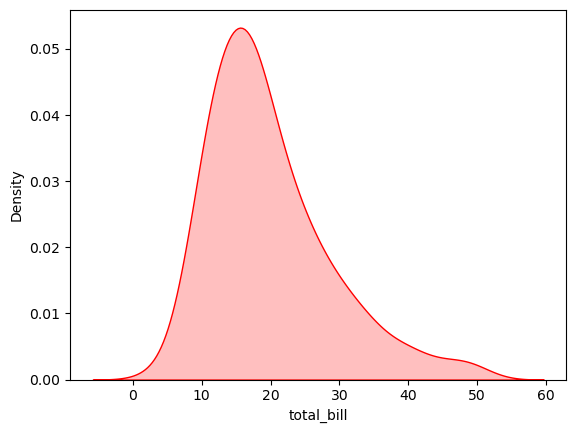

In [86]:
sns.kdeplot(x = "total_bill", data=tips, shade= True, color="red");

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:CENTER; border-radius:10px 10px;">2-DIMENSIONAL KDE PLOTS</p>

<a id="10"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

We will cover these in more detail later, but just keep in mind you could compare two continuous features and create a 2d KDE plot showing there distributions with the same kdeplot() call. Don't worry about this now, since we will cover it in more detail later when we talk about comparing 2 features against each other in a plot call.

[SOURCE 01](https://seaborn.pydata.org/tutorial/distributions.html) & [SOURCE 02](https://benalexkeen.com/kde-and-violin-plots-using-seaborn/)

**numpy.random.normal()**

The NumPy random normal function enables you to create a NumPy array that contains normally distributed data. Normally distributed data is shaped sort of like a bell, so it's often called the “bell curve.”

[SOURCE 01](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) & [SOURCE 01](https://www.sharpsightlabs.com/blog/numpy-random-normal/)

In [87]:
df = pd.DataFrame(np.random.normal(0,1, size=(100,2)), columns = ["X", "Y"])
df

,X,Y
0,0.154325,0.465575
1,0.313916,0.815160
2,-2.635897,-1.454082
3,1.693811,-0.600662
4,0.117912,-0.080624
...,...,...
95,-0.294720,0.297538
96,-0.632089,-0.596433
97,1.617101,-2.239314
98,0.186316,-1.020521


<AxesSubplot:xlabel='X', ylabel='Density'>

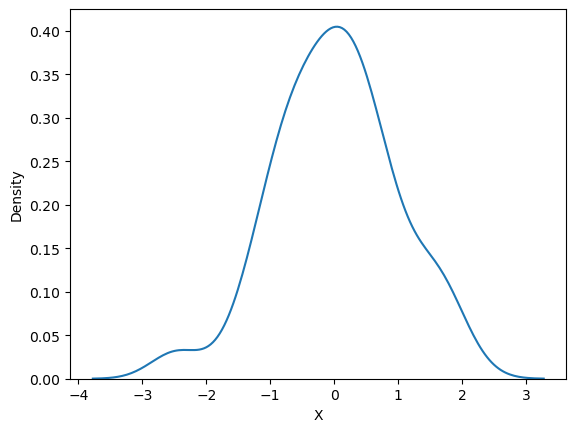

In [89]:
sns.kdeplot(data=df, x="X" )

<AxesSubplot:xlabel='Y', ylabel='Density'>

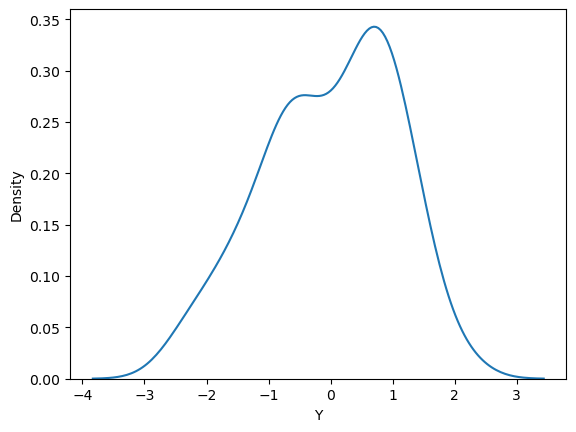

In [90]:
sns.kdeplot(data=df, x="Y" )

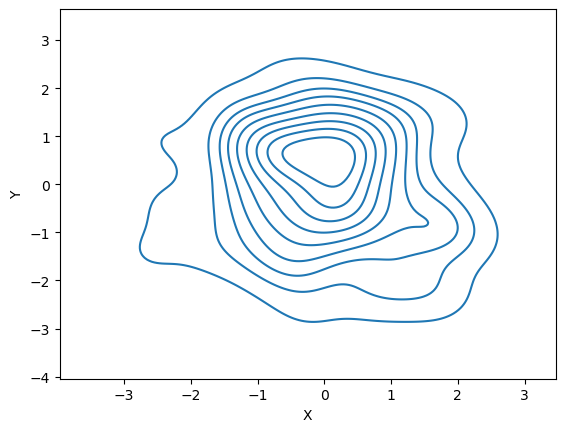

In [93]:
sns.kdeplot(data=df, x="X", y="Y");

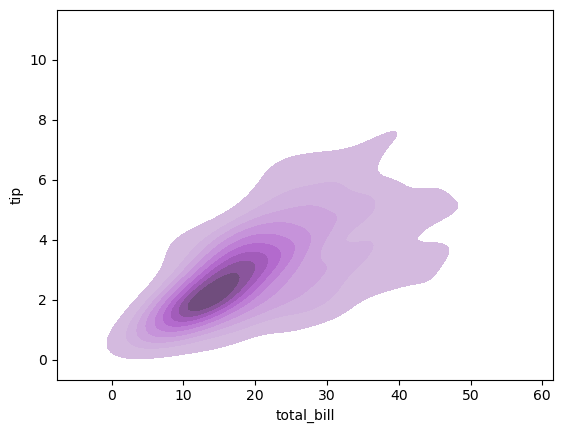

In [95]:
# tips feature ile cizelim bir de

sns.kdeplot(data=tips, x="total_bill", y="tip", shade=True, color="#BF81D6");

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">BONUS CODE FOR VISUALIZATIONS</p>

<a id="11"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Below is the code used to create the visualizations shown in the video lecture for an explanation of a KDE plot. We will not cover this code in further detail, since it was only used for the creation of the slides shown in the video.

In [4]:
np.random.seed(101)

x = np.random.normal(0, 1, size=20)

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">What is dpi in Figure?</p>

<a id="11.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Dots per inches (dpi) determines how many pixels the figure comprises. 

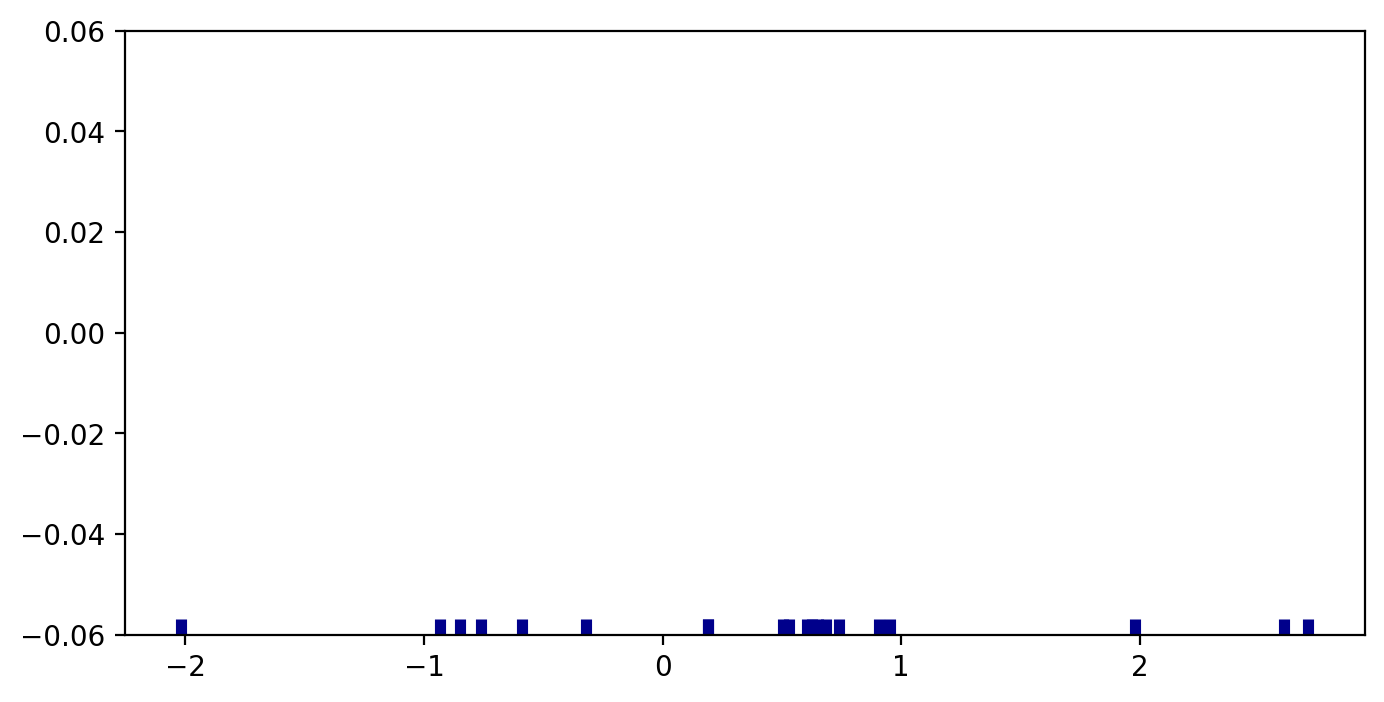

In [5]:
plt.figure(figsize=(8, 4), dpi=200)

sns.rugplot(x, color="darkblue", linewidth=4);

<Figure size 1600x800 with 0 Axes>

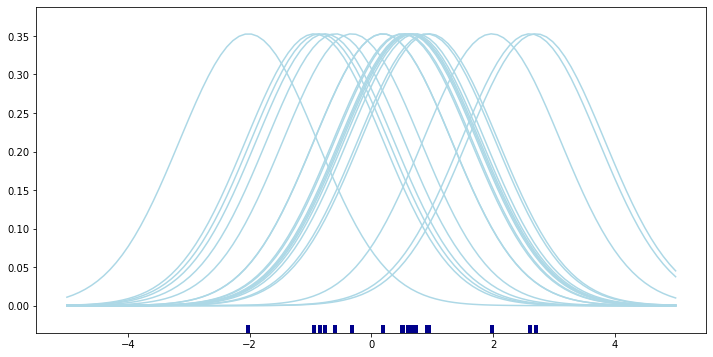

In [6]:
plt.figure(figsize=(8, 4), dpi=200)

bandwidth = x.std() * x.size ** (-0.001)
support = np.linspace(-5, 5, 100)

kernels = []

plt.figure(figsize=(12 ,6))

for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="lightblue")

sns.rugplot(x, color="darkblue", linewidth=4);

**Probability density function (PDF)** is a statistical expression that defines a probability distribution (the likelihood of an outcome) for a discrete random variable (e.g., a stock or ETF) as opposed to a continuous random variable.

<Figure size 1600x800 with 0 Axes>

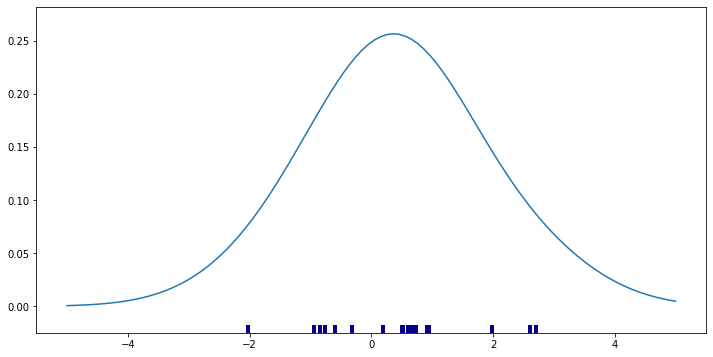

In [7]:
plt.figure(figsize=(8, 4), dpi=200)

from scipy.integrate import trapz

plt.figure(figsize=(12, 6))

density = np.sum(kernels, axis=0)
density /= trapz(density, support)

plt.plot(support, density);
sns.rugplot(x, color="darkblue", linewidth=4);

**numpy.trapz(y, x=None, dx=1.0, axis=- 1)** integrates along the given axis using the composite trapezoidal rule.

trapz computes the approximation of a definite by the trapezoid rule. trapz returns the approximation of the integral using the trapezoid rule.

[SOURCE](https://numpy.org/doc/stable/reference/generated/numpy.trapz.html)

<Figure size 1600x800 with 0 Axes>

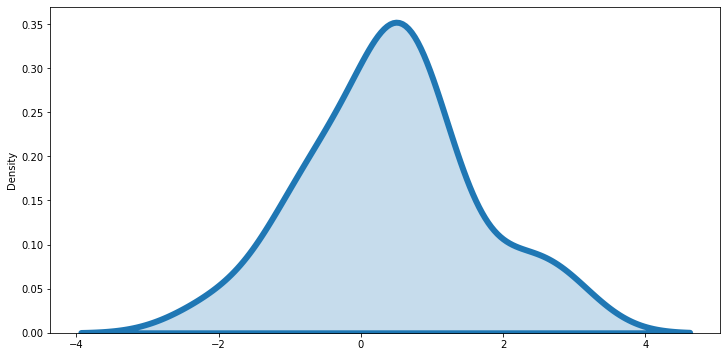

In [8]:
plt.figure(figsize=(8, 4), dpi=200)

bandwidth = x.std() * x.size ** (-0.001)
support = np.linspace(-5, 5, 100)

kernels = []

plt.figure(figsize=(12, 6))

for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
#     plt.plot(support, kernel, color="lightblue")

# sns.rugplot(x, color="darkblue", linewidth=4)
sns.kdeplot(x,linewidth=6,shade=True);

### Why Do We Need Data Visualization & EDA?
- Displaying statistical summaries
- Gaining mor info while interpreting the data.
- Identifying Patterns and Clusters.
- You will mostly be expected to make decision or interpretations before diving into the model. Even if you do, you are required to capture some patterns before modelling. 
- EDA processing is critical in this case. It is critical to capture hidden and/or underlying patterns.
- Presenting results
- Before diving into the model, Visualization is crutial to present and percieve patterns.
- Visualization is necessary to make the data talk to us and/or audiences. A picture is worth a thousand words. 
- It is necessary to evaluate the Model Performance.
- EDA processing consists of most part of the data handling; on the other hand, modeling only takes 10-15% of the time.
- The data needs to dance with the graphics/figures to reveal the underlying patterns. Or you will be got stuck with data.
- The visualization can be obtained using Matplotlib, Seaborn and Pandas. Matplotlib is the basis of these three.
- Seaborn: I say Statisksel says at the beginning. I use matplotlibi as a sub-structure. and a super product cikmis
- Pandas is easy for visualization so it can firstly be prefered to visualize the data.
- At Seaborn the great graphics can be created.
- Matplotlib can customize the data in detail but it is complicated and cumbersome to use. On the other hand Seaborn easily uses DEFAULT values for visualization. Seaborn is also focused on statistics.
- Using df is necessary to to make visualization at Pandas.
- Ci: A confidence interval displays the probability (default or common/conventional usage 95%) that a parameter will fall between a pair of values around the mean .  would like to mean water overalls. You can obtain this at Seaborn.
- KDE: Kernel Density Estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.
- Seaborn also adds these additional features into graphs by means of parameters easily. Moreover while using Seaborn for visualization you can easily reach the statistical summaries of mean, sd, variance etc. This gives us an analytical capacity to analyze the data and more flexiabilty than the other libraries do.
- At Seaborn you can also get the std at the bars.
- At your studies the order may be using 1) Seaborn, 2) Pandas and 3) matplotlip, respectively. Nevertheless, those all are necessary to combine the options of visualization for getting a better Data Analyst/Scientist.
- If you know Statistics, making the statistical graphics is crucial to percieve underlying patterns of the data in EDA processing.
- To sum up, it is necessary to know all of them.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">THE END OF THE SEABORN SESSION 01</p>

<a id="12"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>